<a href="https://colab.research.google.com/github/kartikgill/The-GAN-Book/blob/main/Skill-03/Mode%20Collapse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing useful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

In [2]:
import tensorflow
print (tensorflow.__version__)

2.4.1


# Download and show Data samples

Training data shapes: X=(60000, 28, 28), y=(60000,)
Testing data shapes: X=(10000, 28, 28), y=(10000,)


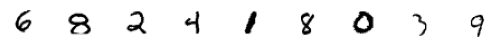

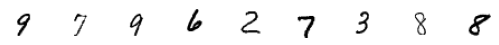

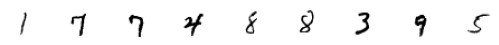

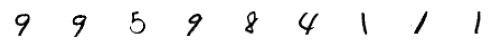

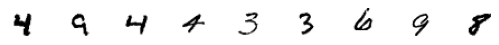

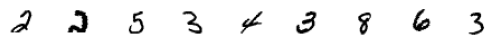

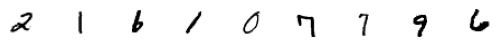

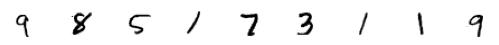

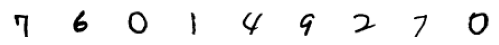

In [3]:
from tensorflow.keras.datasets import mnist

(trainX, trainY), (testX, testY) = mnist.load_data()

print('Training data shapes: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Testing data shapes: X=%s, y=%s' % (testX.shape, testY.shape))

for k in range(9):
    plt.figure(figsize=(9, 6))
    for j in range(9):
        i = np.random.randint(0, 10000)
        plt.subplot(990 + 1 + j)
        plt.imshow(trainX[i], cmap='gray_r')
        #plt.title(trainY[i])
        plt.axis('off')
    plt.show()

# Data Normalization

In [4]:
trainX = [image/255.0 for image in trainX]
testX = [image/255.0 for image in testX]

trainX = np.reshape(trainX, (60000, 28, 28, 1))
testX = np.reshape(testX, (10000, 28, 28, 1))

print (trainX.shape, testX.shape, trainY.shape, testY.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


# Define Generator Model

In [5]:
random_input = tensorflow.keras.layers.Input(shape = 2)

x = tensorflow.keras.layers.Dense(64, activation='relu')(random_input)
x = tensorflow.keras.layers.Dense(28*28)(x)
x = tensorflow.keras.layers.Reshape((28, 28, 1))(x)

generated_image = tensorflow.keras.layers.Activation('sigmoid')(x)

generator_network = tensorflow.keras.models.Model(inputs=random_input, outputs=generated_image)
generator_network.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 64)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
activation (Activation)      (None, 28, 28, 1)         0         
Total params: 51,152
Trainable params: 51,152
Non-trainable params: 0
_________________________________________________________________


# Define Discriminator

In [6]:
image_input = tensorflow.keras.layers.Input(shape=(28, 28, 1))

x = tensorflow.keras.layers.Flatten()(image_input)
x = tensorflow.keras.layers.Dense(64, activation='relu')(x)
x = tensorflow.keras.layers.Dense(1)(x)

real_vs_fake_output = tensorflow.keras.layers.Activation('sigmoid')(x)

discriminator_network = tensorflow.keras.models.Model(inputs=image_input, outputs=real_vs_fake_output)
discriminator_network.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 50,305
Trainable params: 50,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
adam_optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5)
discriminator_network.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# Define combined model: GAN

In [8]:
discriminator_network.trainable=False

g_output = generator_network(random_input)
d_output = discriminator_network(g_output)

gan_model = tensorflow.keras.models.Model(random_input, d_output)
gan_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
model (Functional)           (None, 28, 28, 1)         51152     
_________________________________________________________________
model_1 (Functional)         (None, 1)                 50305     
Total params: 101,457
Trainable params: 51,152
Non-trainable params: 50,305
_________________________________________________________________


# Compiling GAN

In [9]:
gan_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer)

# Define Data Generators

In [10]:
# Indices of Zero Images
#indices = list(np.where(trainY==0)[0])
indices = [i for i in range(60000)]

def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

def get_fake_samples(generator_network, batch_size, noise_size):
    random_noise_batch = get_random_noise(batch_size, noise_size) 
    fake_samples = generator_network.predict_on_batch(random_noise_batch)
    return fake_samples

def get_real_samples(batch_size):
    random_indices = np.random.choice(indices, size=batch_size)
    real_images = trainX[np.array(random_indices),:]
    return real_images

def show_generator_results(generator_network):
    fake_samples = get_fake_samples(generator_network, 81, noise_size)

    counter = 0
    for k in range(9):
        plt.figure(figsize=(9, 6))
        for j in range(9):
            plt.subplot(990 + 1 + j)
            plt.imshow(fake_samples[counter, :, :, 0], cmap='gray_r')
            counter += 1
            plt.axis('off')
        plt.show()
    return

# Training GAN

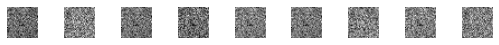

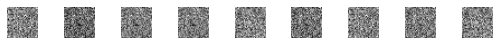

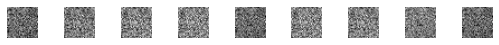

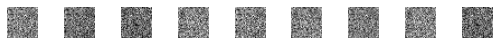

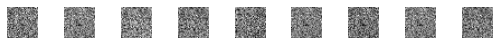

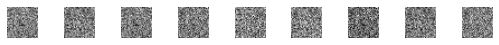

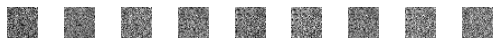

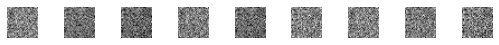

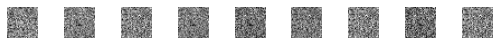

Epoch:0, Step:0, D-Loss:0.523, D-Acc:51.667, G-Loss:1.977
Epoch:0, Step:50, D-Loss:0.083, D-Acc:100.000, G-Loss:3.692
Epoch:0, Step:100, D-Loss:0.033, D-Acc:100.000, G-Loss:4.743
Epoch:0, Step:150, D-Loss:0.014, D-Acc:100.000, G-Loss:5.357
Epoch:0, Step:200, D-Loss:0.015, D-Acc:100.000, G-Loss:5.947
Epoch:0, Step:250, D-Loss:0.012, D-Acc:100.000, G-Loss:6.363
Epoch:0, Step:300, D-Loss:0.010, D-Acc:100.000, G-Loss:7.202
Epoch:0, Step:350, D-Loss:0.008, D-Acc:100.000, G-Loss:7.691
Epoch:0, Step:400, D-Loss:0.032, D-Acc:96.667, G-Loss:7.625
Epoch:0, Step:450, D-Loss:0.007, D-Acc:100.000, G-Loss:7.592
Epoch:1, Step:0, D-Loss:0.008, D-Acc:100.000, G-Loss:7.749
Epoch:1, Step:50, D-Loss:0.010, D-Acc:100.000, G-Loss:7.553
Epoch:1, Step:100, D-Loss:0.012, D-Acc:100.000, G-Loss:7.499
Epoch:1, Step:150, D-Loss:0.049, D-Acc:95.000, G-Loss:7.908
Epoch:1, Step:200, D-Loss:0.011, D-Acc:100.000, G-Loss:7.052
Epoch:1, Step:250, D-Loss:0.042, D-Acc:96.667, G-Loss:7.347
Epoch:1, Step:300, D-Loss:0.021, D

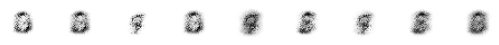

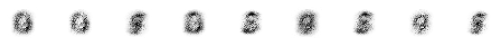

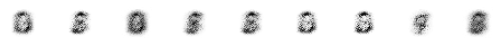

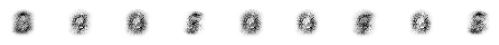

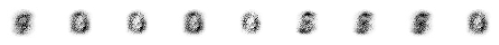

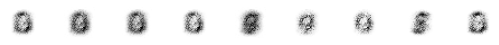

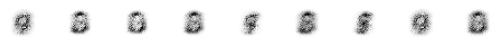

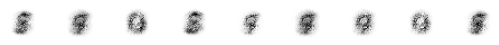

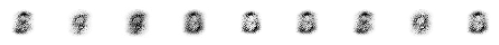

Epoch:5, Step:0, D-Loss:0.311, D-Acc:95.000, G-Loss:1.670
Epoch:5, Step:50, D-Loss:0.260, D-Acc:96.667, G-Loss:1.825
Epoch:5, Step:100, D-Loss:0.182, D-Acc:95.000, G-Loss:1.570
Epoch:5, Step:150, D-Loss:0.242, D-Acc:93.333, G-Loss:1.926
Epoch:5, Step:200, D-Loss:0.291, D-Acc:86.667, G-Loss:1.811
Epoch:5, Step:250, D-Loss:0.254, D-Acc:93.333, G-Loss:1.848
Epoch:5, Step:300, D-Loss:0.220, D-Acc:93.333, G-Loss:1.883
Epoch:5, Step:350, D-Loss:0.248, D-Acc:93.333, G-Loss:1.596
Epoch:5, Step:400, D-Loss:0.317, D-Acc:91.667, G-Loss:1.616
Epoch:5, Step:450, D-Loss:0.241, D-Acc:91.667, G-Loss:1.789
Epoch:6, Step:0, D-Loss:0.192, D-Acc:98.333, G-Loss:1.699
Epoch:6, Step:50, D-Loss:0.237, D-Acc:93.333, G-Loss:1.790
Epoch:6, Step:100, D-Loss:0.253, D-Acc:90.000, G-Loss:1.669
Epoch:6, Step:150, D-Loss:0.154, D-Acc:100.000, G-Loss:1.759
Epoch:6, Step:200, D-Loss:0.210, D-Acc:95.000, G-Loss:1.719
Epoch:6, Step:250, D-Loss:0.223, D-Acc:95.000, G-Loss:1.564
Epoch:6, Step:300, D-Loss:0.194, D-Acc:98.333

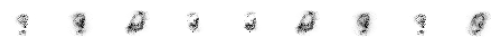

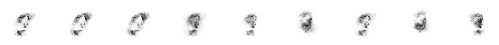

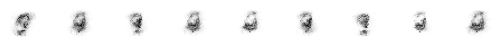

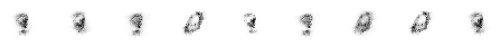

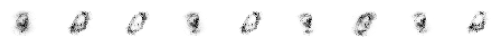

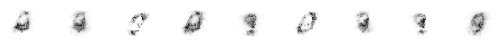

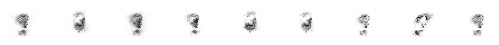

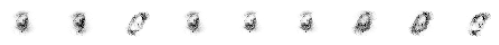

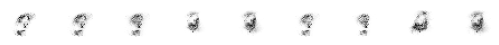

Epoch:10, Step:0, D-Loss:0.140, D-Acc:98.333, G-Loss:1.900
Epoch:10, Step:50, D-Loss:0.147, D-Acc:96.667, G-Loss:1.875
Epoch:10, Step:100, D-Loss:0.161, D-Acc:96.667, G-Loss:1.882
Epoch:10, Step:150, D-Loss:0.143, D-Acc:98.333, G-Loss:1.982
Epoch:10, Step:200, D-Loss:0.118, D-Acc:100.000, G-Loss:2.019
Epoch:10, Step:250, D-Loss:0.147, D-Acc:95.000, G-Loss:1.991
Epoch:10, Step:300, D-Loss:0.112, D-Acc:98.333, G-Loss:2.095
Epoch:10, Step:350, D-Loss:0.134, D-Acc:100.000, G-Loss:2.132
Epoch:10, Step:400, D-Loss:0.114, D-Acc:100.000, G-Loss:1.995
Epoch:10, Step:450, D-Loss:0.139, D-Acc:98.333, G-Loss:2.057
Epoch:11, Step:0, D-Loss:0.103, D-Acc:100.000, G-Loss:2.282
Epoch:11, Step:50, D-Loss:0.143, D-Acc:98.333, G-Loss:2.216
Epoch:11, Step:100, D-Loss:0.130, D-Acc:96.667, G-Loss:2.166
Epoch:11, Step:150, D-Loss:0.115, D-Acc:100.000, G-Loss:2.081
Epoch:11, Step:200, D-Loss:0.127, D-Acc:95.000, G-Loss:2.247
Epoch:11, Step:250, D-Loss:0.103, D-Acc:100.000, G-Loss:2.116
Epoch:11, Step:300, D-Lo

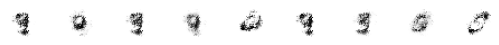

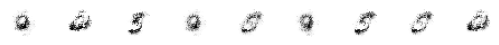

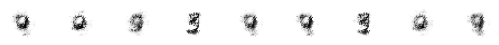

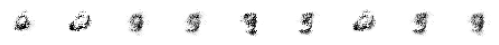

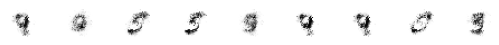

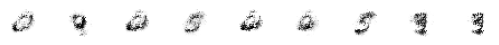

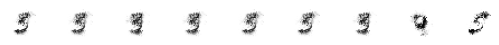

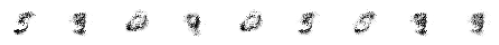

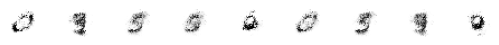

Epoch:15, Step:0, D-Loss:0.095, D-Acc:98.333, G-Loss:2.706
Epoch:15, Step:50, D-Loss:0.096, D-Acc:98.333, G-Loss:2.894
Epoch:15, Step:100, D-Loss:0.092, D-Acc:100.000, G-Loss:2.792
Epoch:15, Step:150, D-Loss:0.080, D-Acc:98.333, G-Loss:2.621
Epoch:15, Step:200, D-Loss:0.110, D-Acc:96.667, G-Loss:2.721
Epoch:15, Step:250, D-Loss:0.094, D-Acc:96.667, G-Loss:2.734
Epoch:15, Step:300, D-Loss:0.052, D-Acc:100.000, G-Loss:2.835
Epoch:15, Step:350, D-Loss:0.057, D-Acc:100.000, G-Loss:2.726
Epoch:15, Step:400, D-Loss:0.073, D-Acc:98.333, G-Loss:2.924
Epoch:15, Step:450, D-Loss:0.054, D-Acc:100.000, G-Loss:2.755
Epoch:16, Step:0, D-Loss:0.057, D-Acc:100.000, G-Loss:2.940
Epoch:16, Step:50, D-Loss:0.071, D-Acc:98.333, G-Loss:3.026
Epoch:16, Step:100, D-Loss:0.134, D-Acc:96.667, G-Loss:2.644
Epoch:16, Step:150, D-Loss:0.061, D-Acc:98.333, G-Loss:3.062
Epoch:16, Step:200, D-Loss:0.072, D-Acc:98.333, G-Loss:2.975
Epoch:16, Step:250, D-Loss:0.073, D-Acc:98.333, G-Loss:3.160
Epoch:16, Step:300, D-Los

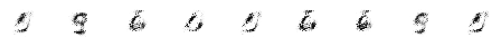

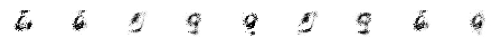

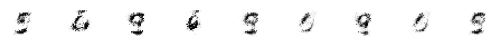

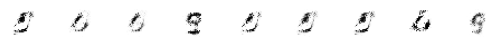

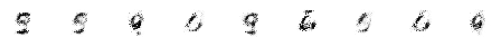

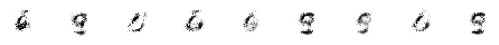

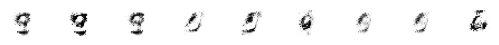

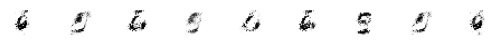

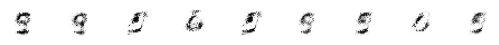

Epoch:20, Step:0, D-Loss:0.069, D-Acc:98.333, G-Loss:3.237
Epoch:20, Step:50, D-Loss:0.025, D-Acc:100.000, G-Loss:3.272
Epoch:20, Step:100, D-Loss:0.024, D-Acc:100.000, G-Loss:3.382
Epoch:20, Step:150, D-Loss:0.040, D-Acc:100.000, G-Loss:3.430
Epoch:20, Step:200, D-Loss:0.062, D-Acc:98.333, G-Loss:3.482
Epoch:20, Step:250, D-Loss:0.068, D-Acc:98.333, G-Loss:3.521
Epoch:20, Step:300, D-Loss:0.031, D-Acc:100.000, G-Loss:3.632
Epoch:20, Step:350, D-Loss:0.024, D-Acc:100.000, G-Loss:3.410
Epoch:20, Step:400, D-Loss:0.030, D-Acc:100.000, G-Loss:3.492
Epoch:20, Step:450, D-Loss:0.040, D-Acc:100.000, G-Loss:3.191
Epoch:21, Step:0, D-Loss:0.067, D-Acc:98.333, G-Loss:3.267
Epoch:21, Step:50, D-Loss:0.062, D-Acc:98.333, G-Loss:3.306
Epoch:21, Step:100, D-Loss:0.053, D-Acc:96.667, G-Loss:3.244
Epoch:21, Step:150, D-Loss:0.027, D-Acc:100.000, G-Loss:3.381
Epoch:21, Step:200, D-Loss:0.046, D-Acc:100.000, G-Loss:3.301
Epoch:21, Step:250, D-Loss:0.037, D-Acc:100.000, G-Loss:3.388
Epoch:21, Step:300, 

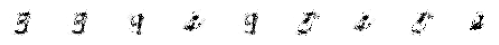

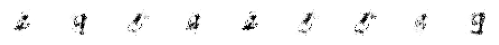

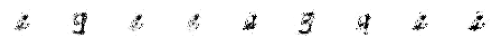

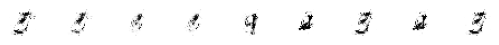

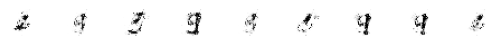

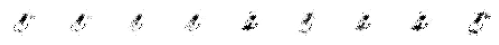

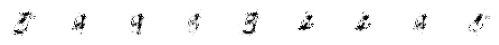

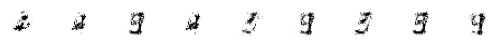

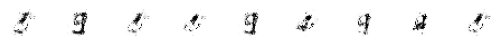

Epoch:25, Step:0, D-Loss:0.023, D-Acc:100.000, G-Loss:3.735
Epoch:25, Step:50, D-Loss:0.020, D-Acc:100.000, G-Loss:3.920
Epoch:25, Step:100, D-Loss:0.019, D-Acc:100.000, G-Loss:4.027
Epoch:25, Step:150, D-Loss:0.027, D-Acc:100.000, G-Loss:4.057
Epoch:25, Step:200, D-Loss:0.017, D-Acc:100.000, G-Loss:3.819
Epoch:25, Step:250, D-Loss:0.039, D-Acc:100.000, G-Loss:3.783
Epoch:25, Step:300, D-Loss:0.023, D-Acc:100.000, G-Loss:3.960
Epoch:25, Step:350, D-Loss:0.054, D-Acc:98.333, G-Loss:3.980
Epoch:25, Step:400, D-Loss:0.034, D-Acc:98.333, G-Loss:3.751
Epoch:25, Step:450, D-Loss:0.053, D-Acc:98.333, G-Loss:3.734
Epoch:26, Step:0, D-Loss:0.011, D-Acc:100.000, G-Loss:4.076
Epoch:26, Step:50, D-Loss:0.011, D-Acc:100.000, G-Loss:4.032
Epoch:26, Step:100, D-Loss:0.017, D-Acc:100.000, G-Loss:3.749
Epoch:26, Step:150, D-Loss:0.034, D-Acc:100.000, G-Loss:4.004
Epoch:26, Step:200, D-Loss:0.067, D-Acc:96.667, G-Loss:3.789
Epoch:26, Step:250, D-Loss:0.014, D-Acc:100.000, G-Loss:4.004
Epoch:26, Step:300

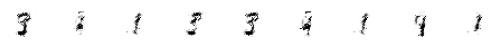

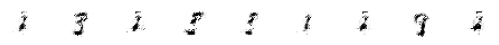

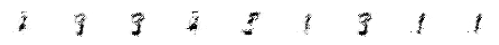

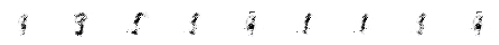

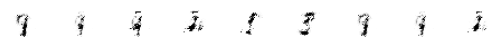

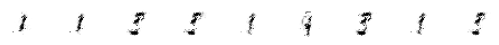

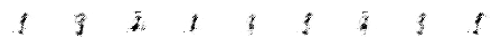

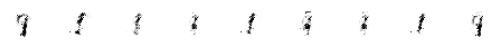

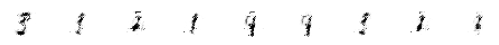

Epoch:30, Step:0, D-Loss:0.026, D-Acc:100.000, G-Loss:3.674
Epoch:30, Step:50, D-Loss:0.025, D-Acc:100.000, G-Loss:3.482
Epoch:30, Step:100, D-Loss:0.029, D-Acc:100.000, G-Loss:3.763
Epoch:30, Step:150, D-Loss:0.029, D-Acc:100.000, G-Loss:3.706
Epoch:30, Step:200, D-Loss:0.038, D-Acc:100.000, G-Loss:3.681
Epoch:30, Step:250, D-Loss:0.031, D-Acc:100.000, G-Loss:3.625
Epoch:30, Step:300, D-Loss:0.039, D-Acc:98.333, G-Loss:3.880
Epoch:30, Step:350, D-Loss:0.041, D-Acc:96.667, G-Loss:3.702
Epoch:30, Step:400, D-Loss:0.049, D-Acc:98.333, G-Loss:3.994
Epoch:30, Step:450, D-Loss:0.035, D-Acc:100.000, G-Loss:3.908
Epoch:31, Step:0, D-Loss:0.047, D-Acc:96.667, G-Loss:3.795
Epoch:31, Step:50, D-Loss:0.050, D-Acc:98.333, G-Loss:3.971
Epoch:31, Step:100, D-Loss:0.015, D-Acc:100.000, G-Loss:3.952
Epoch:31, Step:150, D-Loss:0.018, D-Acc:100.000, G-Loss:3.736
Epoch:31, Step:200, D-Loss:0.067, D-Acc:98.333, G-Loss:3.851
Epoch:31, Step:250, D-Loss:0.053, D-Acc:98.333, G-Loss:3.761
Epoch:31, Step:300, D

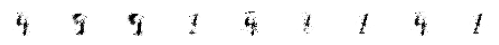

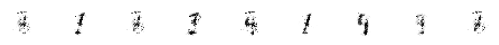

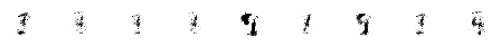

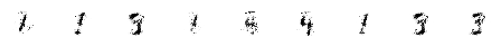

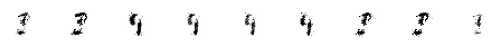

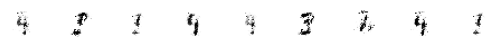

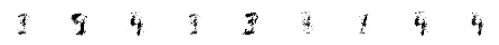

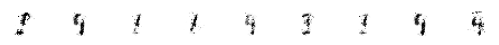

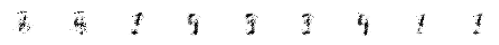

Epoch:35, Step:0, D-Loss:0.023, D-Acc:100.000, G-Loss:3.682
Epoch:35, Step:50, D-Loss:0.022, D-Acc:100.000, G-Loss:3.694
Epoch:35, Step:100, D-Loss:0.014, D-Acc:100.000, G-Loss:3.885
Epoch:35, Step:150, D-Loss:0.041, D-Acc:98.333, G-Loss:3.969
Epoch:35, Step:200, D-Loss:0.017, D-Acc:100.000, G-Loss:3.961
Epoch:35, Step:250, D-Loss:0.010, D-Acc:100.000, G-Loss:4.257
Epoch:35, Step:300, D-Loss:0.036, D-Acc:98.333, G-Loss:4.028
Epoch:35, Step:350, D-Loss:0.016, D-Acc:100.000, G-Loss:3.916
Epoch:35, Step:400, D-Loss:0.022, D-Acc:100.000, G-Loss:3.922
Epoch:35, Step:450, D-Loss:0.029, D-Acc:98.333, G-Loss:3.976
Epoch:36, Step:0, D-Loss:0.027, D-Acc:100.000, G-Loss:4.050
Epoch:36, Step:50, D-Loss:0.010, D-Acc:100.000, G-Loss:4.257
Epoch:36, Step:100, D-Loss:0.021, D-Acc:100.000, G-Loss:4.349
Epoch:36, Step:150, D-Loss:0.041, D-Acc:98.333, G-Loss:4.135
Epoch:36, Step:200, D-Loss:0.013, D-Acc:100.000, G-Loss:4.125
Epoch:36, Step:250, D-Loss:0.012, D-Acc:100.000, G-Loss:3.897
Epoch:36, Step:300

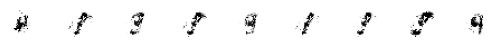

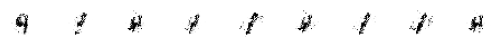

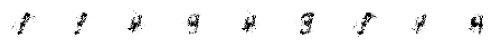

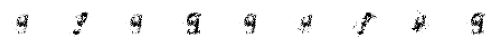

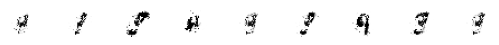

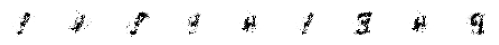

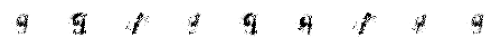

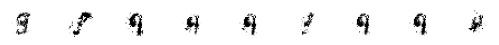

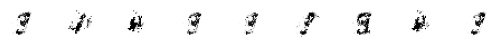

Epoch:40, Step:0, D-Loss:0.009, D-Acc:100.000, G-Loss:4.452
Epoch:40, Step:50, D-Loss:0.014, D-Acc:100.000, G-Loss:4.099
Epoch:40, Step:100, D-Loss:0.023, D-Acc:100.000, G-Loss:3.983
Epoch:40, Step:150, D-Loss:0.031, D-Acc:98.333, G-Loss:4.138
Epoch:40, Step:200, D-Loss:0.042, D-Acc:98.333, G-Loss:4.125
Epoch:40, Step:250, D-Loss:0.010, D-Acc:100.000, G-Loss:4.394
Epoch:40, Step:300, D-Loss:0.013, D-Acc:100.000, G-Loss:4.241
Epoch:40, Step:350, D-Loss:0.035, D-Acc:98.333, G-Loss:4.098
Epoch:40, Step:400, D-Loss:0.039, D-Acc:98.333, G-Loss:4.222
Epoch:40, Step:450, D-Loss:0.014, D-Acc:100.000, G-Loss:4.142
Epoch:41, Step:0, D-Loss:0.033, D-Acc:100.000, G-Loss:4.193
Epoch:41, Step:50, D-Loss:0.037, D-Acc:98.333, G-Loss:4.339
Epoch:41, Step:100, D-Loss:0.009, D-Acc:100.000, G-Loss:4.833
Epoch:41, Step:150, D-Loss:0.021, D-Acc:100.000, G-Loss:4.775
Epoch:41, Step:200, D-Loss:0.076, D-Acc:98.333, G-Loss:4.251
Epoch:41, Step:250, D-Loss:0.048, D-Acc:98.333, G-Loss:4.557
Epoch:41, Step:300, D

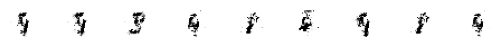

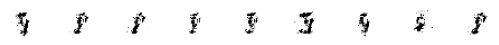

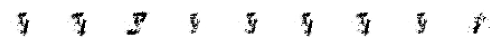

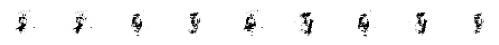

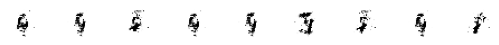

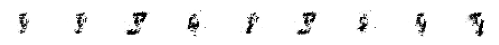

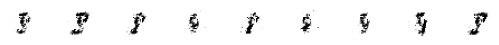

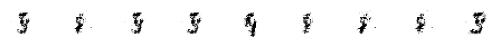

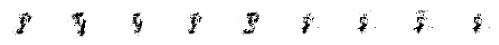

Epoch:45, Step:0, D-Loss:0.013, D-Acc:100.000, G-Loss:4.559
Epoch:45, Step:50, D-Loss:0.007, D-Acc:100.000, G-Loss:4.747
Epoch:45, Step:100, D-Loss:0.014, D-Acc:100.000, G-Loss:4.570
Epoch:45, Step:150, D-Loss:0.039, D-Acc:98.333, G-Loss:4.471
Epoch:45, Step:200, D-Loss:0.015, D-Acc:100.000, G-Loss:4.607
Epoch:45, Step:250, D-Loss:0.047, D-Acc:96.667, G-Loss:4.520
Epoch:45, Step:300, D-Loss:0.063, D-Acc:98.333, G-Loss:4.945
Epoch:45, Step:350, D-Loss:0.105, D-Acc:93.333, G-Loss:4.442
Epoch:45, Step:400, D-Loss:0.018, D-Acc:100.000, G-Loss:4.262
Epoch:45, Step:450, D-Loss:0.052, D-Acc:96.667, G-Loss:3.885
Epoch:46, Step:0, D-Loss:0.014, D-Acc:100.000, G-Loss:4.350
Epoch:46, Step:50, D-Loss:0.018, D-Acc:100.000, G-Loss:4.166
Epoch:46, Step:100, D-Loss:0.015, D-Acc:100.000, G-Loss:4.193
Epoch:46, Step:150, D-Loss:0.016, D-Acc:100.000, G-Loss:4.426
Epoch:46, Step:200, D-Loss:0.011, D-Acc:100.000, G-Loss:4.155
Epoch:46, Step:250, D-Loss:0.011, D-Acc:100.000, G-Loss:4.383
Epoch:46, Step:300,

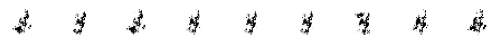

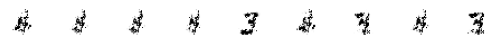

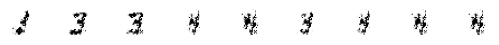

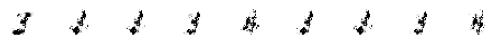

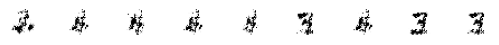

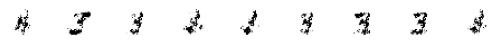

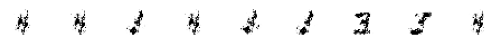

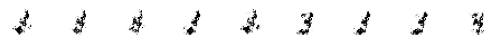

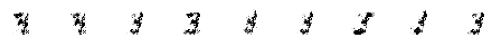

Epoch:50, Step:0, D-Loss:0.007, D-Acc:100.000, G-Loss:5.282
Epoch:50, Step:50, D-Loss:0.011, D-Acc:100.000, G-Loss:5.031
Epoch:50, Step:100, D-Loss:0.016, D-Acc:100.000, G-Loss:5.422
Epoch:50, Step:150, D-Loss:0.027, D-Acc:98.333, G-Loss:4.913
Epoch:50, Step:200, D-Loss:0.007, D-Acc:100.000, G-Loss:5.207
Epoch:50, Step:250, D-Loss:0.014, D-Acc:100.000, G-Loss:5.326
Epoch:50, Step:300, D-Loss:0.012, D-Acc:100.000, G-Loss:5.495
Epoch:50, Step:350, D-Loss:0.099, D-Acc:98.333, G-Loss:5.083
Epoch:50, Step:400, D-Loss:0.007, D-Acc:100.000, G-Loss:5.172
Epoch:50, Step:450, D-Loss:0.050, D-Acc:98.333, G-Loss:5.347
Epoch:51, Step:0, D-Loss:0.007, D-Acc:100.000, G-Loss:5.437
Epoch:51, Step:50, D-Loss:0.018, D-Acc:100.000, G-Loss:5.068
Epoch:51, Step:100, D-Loss:0.008, D-Acc:100.000, G-Loss:5.182
Epoch:51, Step:150, D-Loss:0.018, D-Acc:100.000, G-Loss:5.290
Epoch:51, Step:200, D-Loss:0.006, D-Acc:100.000, G-Loss:4.777
Epoch:51, Step:250, D-Loss:0.007, D-Acc:100.000, G-Loss:4.709
Epoch:51, Step:30

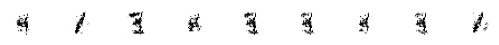

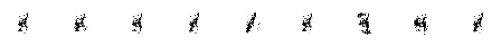

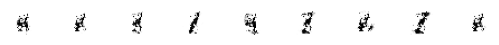

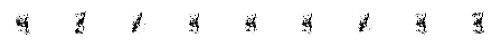

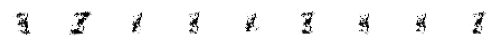

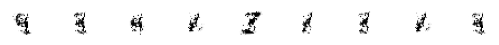

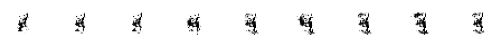

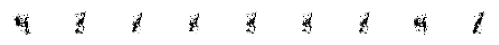

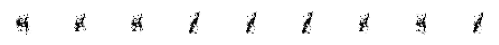

Epoch:55, Step:0, D-Loss:0.016, D-Acc:100.000, G-Loss:4.461
Epoch:55, Step:50, D-Loss:0.045, D-Acc:98.333, G-Loss:4.881
Epoch:55, Step:100, D-Loss:0.011, D-Acc:100.000, G-Loss:5.122
Epoch:55, Step:150, D-Loss:0.008, D-Acc:100.000, G-Loss:5.561
Epoch:55, Step:200, D-Loss:0.009, D-Acc:100.000, G-Loss:4.970
Epoch:55, Step:250, D-Loss:0.075, D-Acc:95.000, G-Loss:4.600
Epoch:55, Step:300, D-Loss:0.013, D-Acc:100.000, G-Loss:4.786
Epoch:55, Step:350, D-Loss:0.011, D-Acc:100.000, G-Loss:4.782
Epoch:55, Step:400, D-Loss:0.012, D-Acc:100.000, G-Loss:4.847
Epoch:55, Step:450, D-Loss:0.008, D-Acc:100.000, G-Loss:4.761
Epoch:56, Step:0, D-Loss:0.011, D-Acc:100.000, G-Loss:4.609
Epoch:56, Step:50, D-Loss:0.006, D-Acc:100.000, G-Loss:4.968
Epoch:56, Step:100, D-Loss:0.006, D-Acc:100.000, G-Loss:4.849
Epoch:56, Step:150, D-Loss:0.043, D-Acc:98.333, G-Loss:4.498
Epoch:56, Step:200, D-Loss:0.015, D-Acc:100.000, G-Loss:4.130
Epoch:56, Step:250, D-Loss:0.033, D-Acc:98.333, G-Loss:4.487
Epoch:56, Step:300

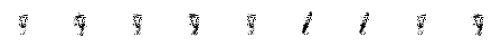

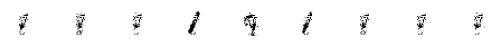

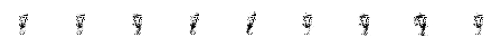

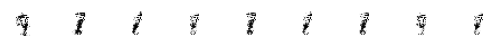

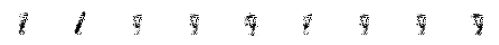

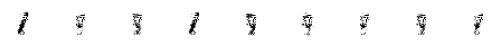

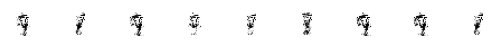

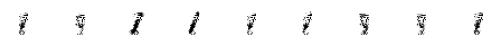

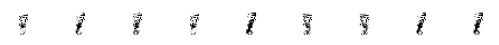

Epoch:60, Step:0, D-Loss:0.007, D-Acc:100.000, G-Loss:4.523
Epoch:60, Step:50, D-Loss:0.008, D-Acc:100.000, G-Loss:4.490
Epoch:60, Step:100, D-Loss:0.011, D-Acc:100.000, G-Loss:4.262
Epoch:60, Step:150, D-Loss:0.050, D-Acc:98.333, G-Loss:4.242
Epoch:60, Step:200, D-Loss:0.029, D-Acc:98.333, G-Loss:4.399
Epoch:60, Step:250, D-Loss:0.017, D-Acc:100.000, G-Loss:4.620
Epoch:60, Step:300, D-Loss:0.017, D-Acc:100.000, G-Loss:4.164
Epoch:60, Step:350, D-Loss:0.011, D-Acc:100.000, G-Loss:4.191
Epoch:60, Step:400, D-Loss:0.012, D-Acc:100.000, G-Loss:3.849
Epoch:60, Step:450, D-Loss:0.033, D-Acc:100.000, G-Loss:3.897
Epoch:61, Step:0, D-Loss:0.022, D-Acc:100.000, G-Loss:3.710
Epoch:61, Step:50, D-Loss:0.012, D-Acc:100.000, G-Loss:4.061
Epoch:61, Step:100, D-Loss:0.085, D-Acc:98.333, G-Loss:3.821
Epoch:61, Step:150, D-Loss:0.030, D-Acc:100.000, G-Loss:3.759
Epoch:61, Step:200, D-Loss:0.146, D-Acc:96.667, G-Loss:3.712
Epoch:61, Step:250, D-Loss:0.022, D-Acc:100.000, G-Loss:4.075
Epoch:61, Step:300

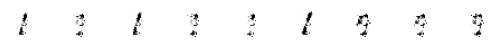

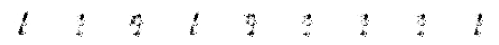

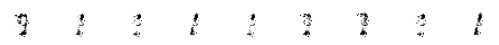

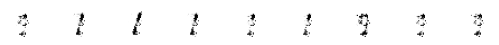

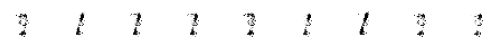

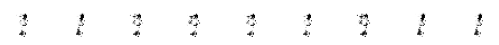

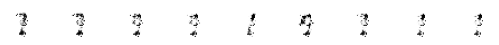

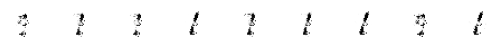

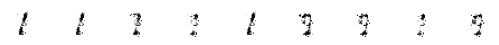

Epoch:65, Step:0, D-Loss:0.006, D-Acc:100.000, G-Loss:4.917
Epoch:65, Step:50, D-Loss:0.006, D-Acc:100.000, G-Loss:5.334
Epoch:65, Step:100, D-Loss:0.016, D-Acc:100.000, G-Loss:5.047
Epoch:65, Step:150, D-Loss:0.005, D-Acc:100.000, G-Loss:4.922
Epoch:65, Step:200, D-Loss:0.005, D-Acc:100.000, G-Loss:5.389
Epoch:65, Step:250, D-Loss:0.009, D-Acc:100.000, G-Loss:4.615
Epoch:65, Step:300, D-Loss:0.090, D-Acc:98.333, G-Loss:5.102
Epoch:65, Step:350, D-Loss:0.008, D-Acc:100.000, G-Loss:4.893
Epoch:65, Step:400, D-Loss:0.011, D-Acc:100.000, G-Loss:4.586
Epoch:65, Step:450, D-Loss:0.015, D-Acc:100.000, G-Loss:4.140
Epoch:66, Step:0, D-Loss:0.025, D-Acc:98.333, G-Loss:4.196
Epoch:66, Step:50, D-Loss:0.010, D-Acc:100.000, G-Loss:4.324
Epoch:66, Step:100, D-Loss:0.010, D-Acc:100.000, G-Loss:4.426
Epoch:66, Step:150, D-Loss:0.013, D-Acc:100.000, G-Loss:4.310
Epoch:66, Step:200, D-Loss:0.011, D-Acc:100.000, G-Loss:4.033
Epoch:66, Step:250, D-Loss:0.007, D-Acc:100.000, G-Loss:4.522
Epoch:66, Step:3

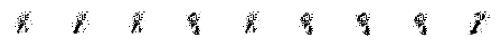

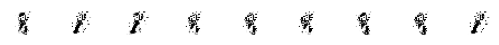

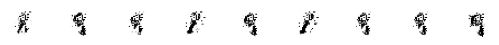

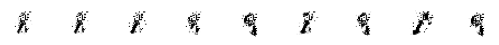

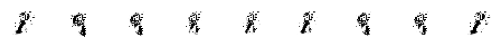

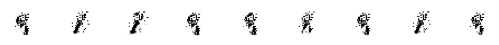

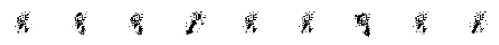

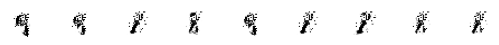

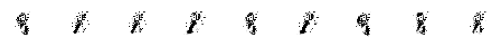

Epoch:70, Step:0, D-Loss:0.004, D-Acc:100.000, G-Loss:5.315
Epoch:70, Step:50, D-Loss:0.009, D-Acc:100.000, G-Loss:5.480
Epoch:70, Step:100, D-Loss:0.003, D-Acc:100.000, G-Loss:5.428
Epoch:70, Step:150, D-Loss:0.005, D-Acc:100.000, G-Loss:5.351
Epoch:70, Step:200, D-Loss:0.004, D-Acc:100.000, G-Loss:5.609
Epoch:70, Step:250, D-Loss:0.055, D-Acc:98.333, G-Loss:5.133
Epoch:70, Step:300, D-Loss:0.007, D-Acc:100.000, G-Loss:5.383
Epoch:70, Step:350, D-Loss:0.009, D-Acc:100.000, G-Loss:5.463
Epoch:70, Step:400, D-Loss:0.008, D-Acc:100.000, G-Loss:5.489
Epoch:70, Step:450, D-Loss:0.062, D-Acc:98.333, G-Loss:4.728
Epoch:71, Step:0, D-Loss:0.010, D-Acc:100.000, G-Loss:5.253
Epoch:71, Step:50, D-Loss:0.060, D-Acc:96.667, G-Loss:5.215
Epoch:71, Step:100, D-Loss:0.005, D-Acc:100.000, G-Loss:5.359
Epoch:71, Step:150, D-Loss:0.017, D-Acc:98.333, G-Loss:5.256
Epoch:71, Step:200, D-Loss:0.009, D-Acc:100.000, G-Loss:5.156
Epoch:71, Step:250, D-Loss:0.003, D-Acc:100.000, G-Loss:5.394
Epoch:71, Step:300

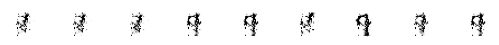

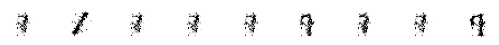

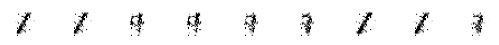

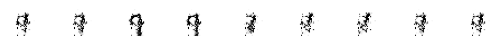

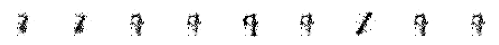

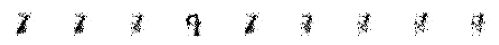

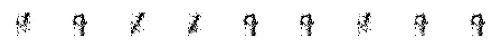

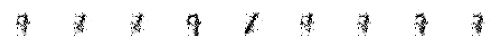

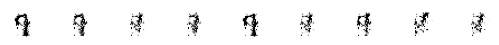

Epoch:75, Step:0, D-Loss:0.007, D-Acc:100.000, G-Loss:4.714
Epoch:75, Step:50, D-Loss:0.042, D-Acc:98.333, G-Loss:4.396
Epoch:75, Step:100, D-Loss:0.009, D-Acc:100.000, G-Loss:4.715
Epoch:75, Step:150, D-Loss:0.005, D-Acc:100.000, G-Loss:5.083
Epoch:75, Step:200, D-Loss:0.030, D-Acc:98.333, G-Loss:4.785
Epoch:75, Step:250, D-Loss:0.014, D-Acc:100.000, G-Loss:4.681
Epoch:75, Step:300, D-Loss:0.014, D-Acc:100.000, G-Loss:4.861
Epoch:75, Step:350, D-Loss:0.011, D-Acc:100.000, G-Loss:5.065
Epoch:75, Step:400, D-Loss:0.008, D-Acc:100.000, G-Loss:5.315
Epoch:75, Step:450, D-Loss:0.007, D-Acc:100.000, G-Loss:5.066
Epoch:76, Step:0, D-Loss:0.061, D-Acc:98.333, G-Loss:4.779
Epoch:76, Step:50, D-Loss:0.005, D-Acc:100.000, G-Loss:5.195
Epoch:76, Step:100, D-Loss:0.023, D-Acc:98.333, G-Loss:5.328
Epoch:76, Step:150, D-Loss:0.034, D-Acc:98.333, G-Loss:4.891
Epoch:76, Step:200, D-Loss:0.018, D-Acc:100.000, G-Loss:5.083
Epoch:76, Step:250, D-Loss:0.004, D-Acc:100.000, G-Loss:5.594
Epoch:76, Step:300,

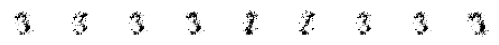

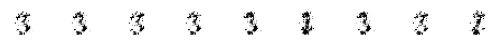

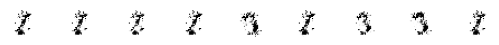

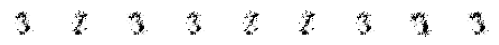

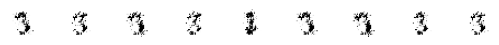

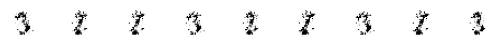

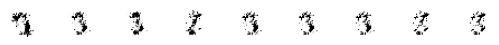

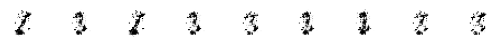

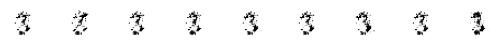

Epoch:80, Step:0, D-Loss:0.014, D-Acc:100.000, G-Loss:4.401
Epoch:80, Step:50, D-Loss:0.069, D-Acc:98.333, G-Loss:4.689
Epoch:80, Step:100, D-Loss:0.011, D-Acc:100.000, G-Loss:4.663
Epoch:80, Step:150, D-Loss:0.021, D-Acc:98.333, G-Loss:4.809
Epoch:80, Step:200, D-Loss:0.012, D-Acc:100.000, G-Loss:4.959
Epoch:80, Step:250, D-Loss:0.008, D-Acc:100.000, G-Loss:4.636
Epoch:80, Step:300, D-Loss:0.022, D-Acc:98.333, G-Loss:4.675
Epoch:80, Step:350, D-Loss:0.013, D-Acc:100.000, G-Loss:5.285
Epoch:80, Step:400, D-Loss:0.148, D-Acc:96.667, G-Loss:5.107
Epoch:80, Step:450, D-Loss:0.008, D-Acc:100.000, G-Loss:5.562
Epoch:81, Step:0, D-Loss:0.006, D-Acc:100.000, G-Loss:5.698
Epoch:81, Step:50, D-Loss:0.005, D-Acc:100.000, G-Loss:5.198
Epoch:81, Step:100, D-Loss:0.004, D-Acc:100.000, G-Loss:5.497
Epoch:81, Step:150, D-Loss:0.010, D-Acc:100.000, G-Loss:5.300
Epoch:81, Step:200, D-Loss:0.005, D-Acc:100.000, G-Loss:5.123
Epoch:81, Step:250, D-Loss:0.008, D-Acc:100.000, G-Loss:4.806
Epoch:81, Step:300

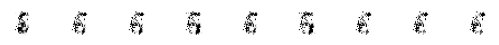

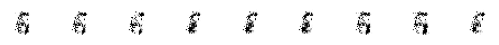

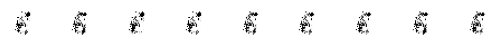

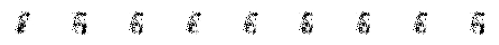

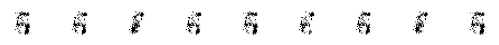

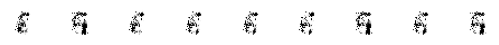

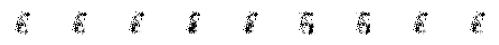

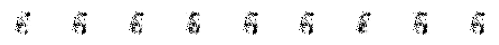

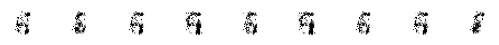

Epoch:85, Step:0, D-Loss:0.004, D-Acc:100.000, G-Loss:5.387
Epoch:85, Step:50, D-Loss:0.030, D-Acc:98.333, G-Loss:5.193
Epoch:85, Step:100, D-Loss:0.029, D-Acc:98.333, G-Loss:4.889
Epoch:85, Step:150, D-Loss:0.035, D-Acc:98.333, G-Loss:4.214
Epoch:85, Step:200, D-Loss:0.104, D-Acc:96.667, G-Loss:4.556
Epoch:85, Step:250, D-Loss:0.014, D-Acc:100.000, G-Loss:5.256
Epoch:85, Step:300, D-Loss:0.010, D-Acc:100.000, G-Loss:5.123
Epoch:85, Step:350, D-Loss:0.010, D-Acc:100.000, G-Loss:5.179
Epoch:85, Step:400, D-Loss:0.026, D-Acc:98.333, G-Loss:4.673
Epoch:85, Step:450, D-Loss:0.006, D-Acc:100.000, G-Loss:5.103
Epoch:86, Step:0, D-Loss:0.016, D-Acc:100.000, G-Loss:5.063
Epoch:86, Step:50, D-Loss:0.010, D-Acc:100.000, G-Loss:4.786
Epoch:86, Step:100, D-Loss:0.012, D-Acc:100.000, G-Loss:4.526
Epoch:86, Step:150, D-Loss:0.058, D-Acc:98.333, G-Loss:4.457
Epoch:86, Step:200, D-Loss:0.009, D-Acc:100.000, G-Loss:4.386
Epoch:86, Step:250, D-Loss:0.075, D-Acc:96.667, G-Loss:4.668
Epoch:86, Step:300, D

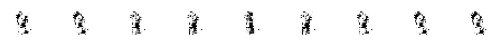

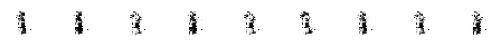

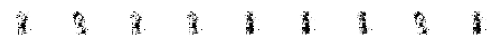

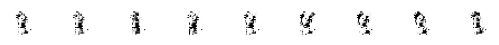

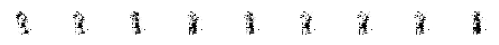

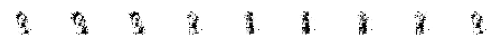

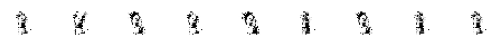

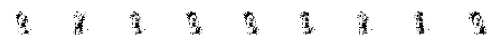

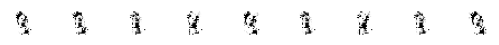

Epoch:90, Step:0, D-Loss:0.011, D-Acc:100.000, G-Loss:5.405
Epoch:90, Step:50, D-Loss:0.015, D-Acc:100.000, G-Loss:4.928
Epoch:90, Step:100, D-Loss:0.005, D-Acc:100.000, G-Loss:5.377
Epoch:90, Step:150, D-Loss:0.126, D-Acc:96.667, G-Loss:4.808
Epoch:90, Step:200, D-Loss:0.018, D-Acc:100.000, G-Loss:5.022
Epoch:90, Step:250, D-Loss:0.008, D-Acc:100.000, G-Loss:4.961
Epoch:90, Step:300, D-Loss:0.010, D-Acc:100.000, G-Loss:5.434
Epoch:90, Step:350, D-Loss:0.005, D-Acc:100.000, G-Loss:5.416
Epoch:90, Step:400, D-Loss:0.007, D-Acc:100.000, G-Loss:5.123
Epoch:90, Step:450, D-Loss:0.014, D-Acc:100.000, G-Loss:5.088
Epoch:91, Step:0, D-Loss:0.019, D-Acc:100.000, G-Loss:4.927
Epoch:91, Step:50, D-Loss:0.012, D-Acc:100.000, G-Loss:4.965
Epoch:91, Step:100, D-Loss:0.004, D-Acc:100.000, G-Loss:5.251
Epoch:91, Step:150, D-Loss:0.040, D-Acc:98.333, G-Loss:5.046
Epoch:91, Step:200, D-Loss:0.009, D-Acc:100.000, G-Loss:4.624
Epoch:91, Step:250, D-Loss:0.039, D-Acc:98.333, G-Loss:4.941
Epoch:91, Step:30

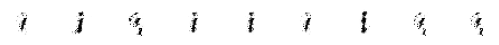

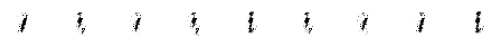

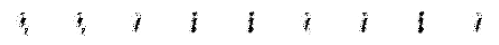

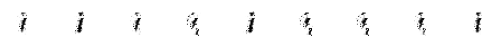

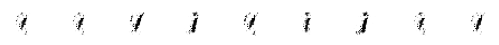

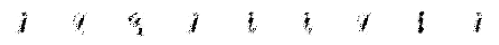

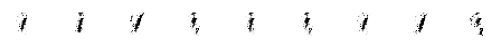

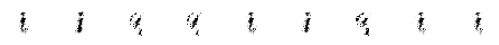

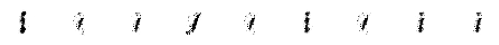

Epoch:95, Step:0, D-Loss:0.016, D-Acc:100.000, G-Loss:3.806
Epoch:95, Step:50, D-Loss:0.018, D-Acc:100.000, G-Loss:4.032
Epoch:95, Step:100, D-Loss:0.029, D-Acc:98.333, G-Loss:4.203
Epoch:95, Step:150, D-Loss:0.027, D-Acc:100.000, G-Loss:4.108
Epoch:95, Step:200, D-Loss:0.056, D-Acc:98.333, G-Loss:3.932
Epoch:95, Step:250, D-Loss:0.020, D-Acc:100.000, G-Loss:4.413
Epoch:95, Step:300, D-Loss:0.013, D-Acc:100.000, G-Loss:4.066
Epoch:95, Step:350, D-Loss:0.041, D-Acc:98.333, G-Loss:4.051
Epoch:95, Step:400, D-Loss:0.063, D-Acc:98.333, G-Loss:4.167
Epoch:95, Step:450, D-Loss:0.069, D-Acc:95.000, G-Loss:4.170
Epoch:96, Step:0, D-Loss:0.044, D-Acc:98.333, G-Loss:4.155
Epoch:96, Step:50, D-Loss:0.027, D-Acc:100.000, G-Loss:4.079
Epoch:96, Step:100, D-Loss:0.029, D-Acc:100.000, G-Loss:3.845
Epoch:96, Step:150, D-Loss:0.023, D-Acc:100.000, G-Loss:4.008
Epoch:96, Step:200, D-Loss:0.014, D-Acc:100.000, G-Loss:4.130
Epoch:96, Step:250, D-Loss:0.028, D-Acc:100.000, G-Loss:3.984
Epoch:96, Step:300, 

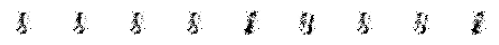

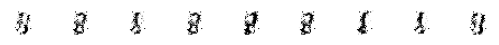

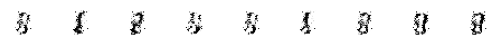

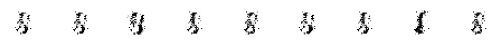

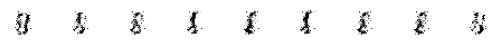

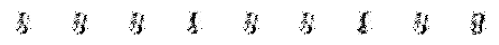

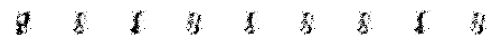

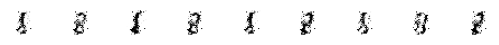

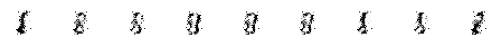

Epoch:100, Step:0, D-Loss:0.026, D-Acc:98.333, G-Loss:4.709
Epoch:100, Step:50, D-Loss:0.018, D-Acc:100.000, G-Loss:4.502
Epoch:100, Step:100, D-Loss:0.057, D-Acc:98.333, G-Loss:4.117
Epoch:100, Step:150, D-Loss:0.010, D-Acc:100.000, G-Loss:4.717
Epoch:100, Step:200, D-Loss:0.083, D-Acc:98.333, G-Loss:4.132
Epoch:100, Step:250, D-Loss:0.045, D-Acc:98.333, G-Loss:3.916
Epoch:100, Step:300, D-Loss:0.011, D-Acc:100.000, G-Loss:4.200
Epoch:100, Step:350, D-Loss:0.144, D-Acc:98.333, G-Loss:4.426
Epoch:100, Step:400, D-Loss:0.019, D-Acc:100.000, G-Loss:4.170
Epoch:100, Step:450, D-Loss:0.018, D-Acc:100.000, G-Loss:4.669
Epoch:101, Step:0, D-Loss:0.009, D-Acc:100.000, G-Loss:4.809
Epoch:101, Step:50, D-Loss:0.013, D-Acc:100.000, G-Loss:4.526
Epoch:101, Step:100, D-Loss:0.092, D-Acc:98.333, G-Loss:4.523
Epoch:101, Step:150, D-Loss:0.049, D-Acc:96.667, G-Loss:4.416
Epoch:101, Step:200, D-Loss:0.012, D-Acc:100.000, G-Loss:4.873
Epoch:101, Step:250, D-Loss:0.066, D-Acc:98.333, G-Loss:4.838
Epoch:

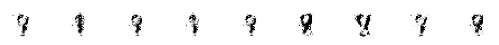

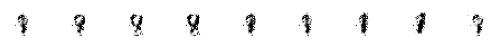

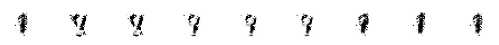

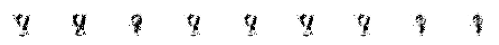

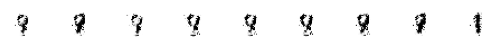

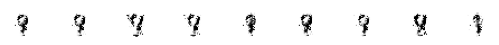

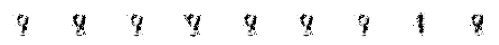

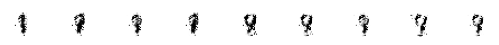

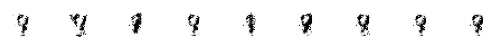

Epoch:105, Step:0, D-Loss:0.168, D-Acc:96.667, G-Loss:4.595
Epoch:105, Step:50, D-Loss:0.135, D-Acc:93.333, G-Loss:3.986
Epoch:105, Step:100, D-Loss:0.050, D-Acc:98.333, G-Loss:4.798
Epoch:105, Step:150, D-Loss:0.029, D-Acc:98.333, G-Loss:4.303
Epoch:105, Step:200, D-Loss:0.015, D-Acc:100.000, G-Loss:4.256
Epoch:105, Step:250, D-Loss:0.012, D-Acc:100.000, G-Loss:4.202
Epoch:105, Step:300, D-Loss:0.050, D-Acc:98.333, G-Loss:4.192
Epoch:105, Step:350, D-Loss:0.025, D-Acc:100.000, G-Loss:4.572
Epoch:105, Step:400, D-Loss:0.052, D-Acc:98.333, G-Loss:4.276
Epoch:105, Step:450, D-Loss:0.029, D-Acc:98.333, G-Loss:4.460
Epoch:106, Step:0, D-Loss:0.057, D-Acc:98.333, G-Loss:4.908
Epoch:106, Step:50, D-Loss:0.014, D-Acc:100.000, G-Loss:4.563
Epoch:106, Step:100, D-Loss:0.016, D-Acc:100.000, G-Loss:4.444
Epoch:106, Step:150, D-Loss:0.014, D-Acc:100.000, G-Loss:4.441
Epoch:106, Step:200, D-Loss:0.033, D-Acc:98.333, G-Loss:4.435
Epoch:106, Step:250, D-Loss:0.009, D-Acc:100.000, G-Loss:4.760
Epoch:1

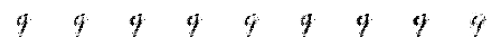

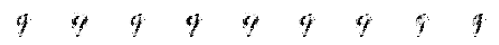

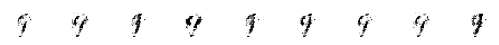

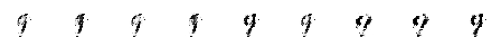

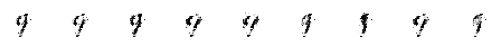

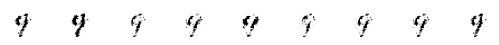

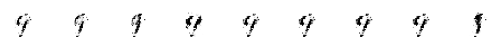

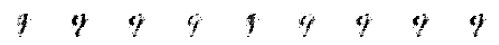

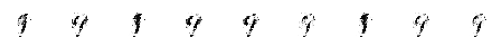

Epoch:110, Step:0, D-Loss:0.013, D-Acc:100.000, G-Loss:4.419
Epoch:110, Step:50, D-Loss:0.008, D-Acc:100.000, G-Loss:4.963
Epoch:110, Step:100, D-Loss:0.010, D-Acc:100.000, G-Loss:4.536
Epoch:110, Step:150, D-Loss:0.014, D-Acc:100.000, G-Loss:4.057
Epoch:110, Step:200, D-Loss:0.037, D-Acc:98.333, G-Loss:4.142
Epoch:110, Step:250, D-Loss:0.133, D-Acc:96.667, G-Loss:3.643
Epoch:110, Step:300, D-Loss:0.071, D-Acc:98.333, G-Loss:4.734
Epoch:110, Step:350, D-Loss:0.099, D-Acc:96.667, G-Loss:4.481
Epoch:110, Step:400, D-Loss:0.056, D-Acc:96.667, G-Loss:4.764
Epoch:110, Step:450, D-Loss:0.008, D-Acc:100.000, G-Loss:4.699
Epoch:111, Step:0, D-Loss:0.008, D-Acc:100.000, G-Loss:4.650
Epoch:111, Step:50, D-Loss:0.011, D-Acc:100.000, G-Loss:4.498
Epoch:111, Step:100, D-Loss:0.008, D-Acc:100.000, G-Loss:4.955
Epoch:111, Step:150, D-Loss:0.011, D-Acc:100.000, G-Loss:5.060
Epoch:111, Step:200, D-Loss:0.020, D-Acc:100.000, G-Loss:4.508
Epoch:111, Step:250, D-Loss:0.079, D-Acc:98.333, G-Loss:3.985
Epoc

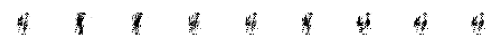

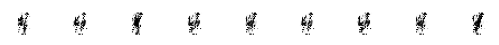

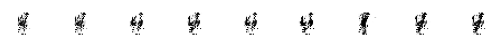

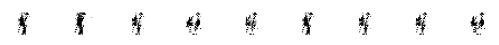

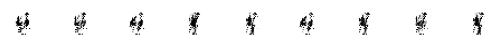

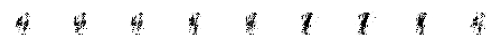

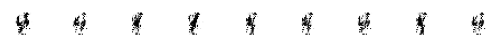

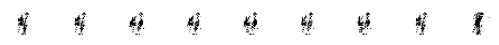

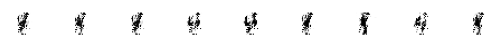

Epoch:115, Step:0, D-Loss:0.005, D-Acc:100.000, G-Loss:4.952
Epoch:115, Step:50, D-Loss:0.009, D-Acc:100.000, G-Loss:5.002
Epoch:115, Step:100, D-Loss:0.033, D-Acc:98.333, G-Loss:5.138
Epoch:115, Step:150, D-Loss:0.096, D-Acc:96.667, G-Loss:5.410
Epoch:115, Step:200, D-Loss:0.017, D-Acc:100.000, G-Loss:5.227
Epoch:115, Step:250, D-Loss:0.019, D-Acc:100.000, G-Loss:5.051
Epoch:115, Step:300, D-Loss:0.009, D-Acc:100.000, G-Loss:5.095
Epoch:115, Step:350, D-Loss:0.008, D-Acc:100.000, G-Loss:5.705
Epoch:115, Step:400, D-Loss:0.023, D-Acc:98.333, G-Loss:4.864
Epoch:115, Step:450, D-Loss:0.005, D-Acc:100.000, G-Loss:5.408
Epoch:116, Step:0, D-Loss:0.005, D-Acc:100.000, G-Loss:5.488
Epoch:116, Step:50, D-Loss:0.007, D-Acc:100.000, G-Loss:5.172
Epoch:116, Step:100, D-Loss:0.011, D-Acc:100.000, G-Loss:4.837
Epoch:116, Step:150, D-Loss:0.009, D-Acc:100.000, G-Loss:5.242
Epoch:116, Step:200, D-Loss:0.005, D-Acc:100.000, G-Loss:5.665
Epoch:116, Step:250, D-Loss:0.004, D-Acc:100.000, G-Loss:5.311
E

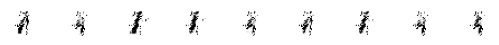

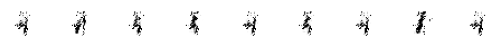

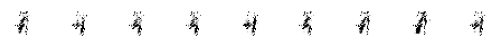

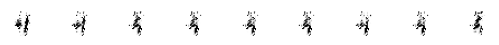

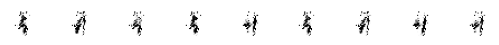

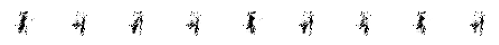

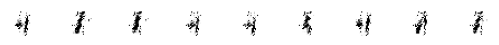

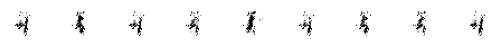

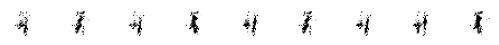

Epoch:120, Step:0, D-Loss:0.058, D-Acc:96.667, G-Loss:4.743
Epoch:120, Step:50, D-Loss:0.196, D-Acc:98.333, G-Loss:4.847
Epoch:120, Step:100, D-Loss:0.030, D-Acc:98.333, G-Loss:4.704
Epoch:120, Step:150, D-Loss:0.039, D-Acc:98.333, G-Loss:4.503
Epoch:120, Step:200, D-Loss:0.055, D-Acc:98.333, G-Loss:4.588
Epoch:120, Step:250, D-Loss:0.008, D-Acc:100.000, G-Loss:5.076
Epoch:120, Step:300, D-Loss:0.068, D-Acc:98.333, G-Loss:4.810
Epoch:120, Step:350, D-Loss:0.009, D-Acc:100.000, G-Loss:4.914
Epoch:120, Step:400, D-Loss:0.008, D-Acc:100.000, G-Loss:4.787
Epoch:120, Step:450, D-Loss:0.020, D-Acc:100.000, G-Loss:5.219
Epoch:121, Step:0, D-Loss:0.007, D-Acc:100.000, G-Loss:5.158
Epoch:121, Step:50, D-Loss:0.014, D-Acc:100.000, G-Loss:5.221
Epoch:121, Step:100, D-Loss:0.038, D-Acc:98.333, G-Loss:4.625
Epoch:121, Step:150, D-Loss:0.007, D-Acc:100.000, G-Loss:4.884
Epoch:121, Step:200, D-Loss:0.015, D-Acc:100.000, G-Loss:5.020
Epoch:121, Step:250, D-Loss:0.025, D-Acc:98.333, G-Loss:5.290
Epoch:

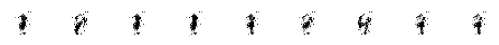

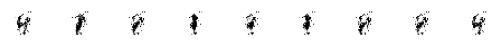

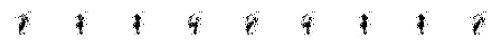

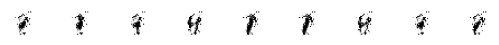

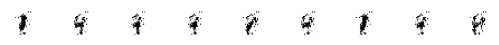

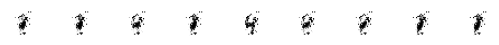

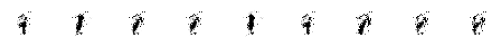

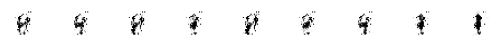

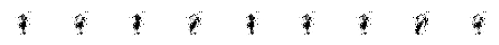

Epoch:125, Step:0, D-Loss:0.009, D-Acc:100.000, G-Loss:4.714
Epoch:125, Step:50, D-Loss:0.020, D-Acc:100.000, G-Loss:4.651
Epoch:125, Step:100, D-Loss:0.017, D-Acc:100.000, G-Loss:4.909
Epoch:125, Step:150, D-Loss:0.041, D-Acc:98.333, G-Loss:4.744
Epoch:125, Step:200, D-Loss:0.006, D-Acc:100.000, G-Loss:4.843
Epoch:125, Step:250, D-Loss:0.014, D-Acc:100.000, G-Loss:4.492
Epoch:125, Step:300, D-Loss:0.011, D-Acc:100.000, G-Loss:4.773
Epoch:125, Step:350, D-Loss:0.013, D-Acc:100.000, G-Loss:5.139
Epoch:125, Step:400, D-Loss:0.019, D-Acc:98.333, G-Loss:5.074
Epoch:125, Step:450, D-Loss:0.014, D-Acc:100.000, G-Loss:5.369
Epoch:126, Step:0, D-Loss:0.075, D-Acc:96.667, G-Loss:4.965
Epoch:126, Step:50, D-Loss:0.009, D-Acc:100.000, G-Loss:4.699
Epoch:126, Step:100, D-Loss:0.070, D-Acc:98.333, G-Loss:4.759
Epoch:126, Step:150, D-Loss:0.013, D-Acc:100.000, G-Loss:4.512
Epoch:126, Step:200, D-Loss:0.077, D-Acc:96.667, G-Loss:4.858
Epoch:126, Step:250, D-Loss:0.078, D-Acc:98.333, G-Loss:5.064
Epoc

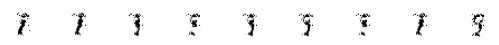

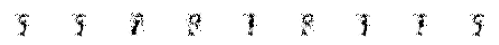

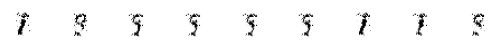

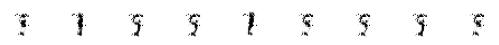

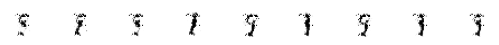

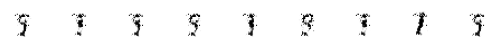

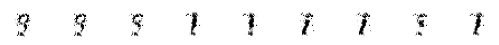

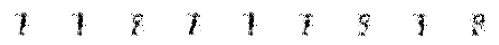

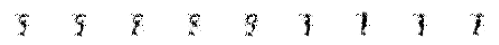

Epoch:130, Step:0, D-Loss:0.110, D-Acc:98.333, G-Loss:4.609
Epoch:130, Step:50, D-Loss:0.008, D-Acc:100.000, G-Loss:5.373
Epoch:130, Step:100, D-Loss:0.023, D-Acc:100.000, G-Loss:4.553
Epoch:130, Step:150, D-Loss:0.016, D-Acc:100.000, G-Loss:4.698
Epoch:130, Step:200, D-Loss:0.019, D-Acc:100.000, G-Loss:4.273
Epoch:130, Step:250, D-Loss:0.008, D-Acc:100.000, G-Loss:4.821
Epoch:130, Step:300, D-Loss:0.037, D-Acc:98.333, G-Loss:4.754
Epoch:130, Step:350, D-Loss:0.007, D-Acc:100.000, G-Loss:4.824
Epoch:130, Step:400, D-Loss:0.013, D-Acc:100.000, G-Loss:4.883
Epoch:130, Step:450, D-Loss:0.011, D-Acc:100.000, G-Loss:4.823
Epoch:131, Step:0, D-Loss:0.011, D-Acc:100.000, G-Loss:4.508
Epoch:131, Step:50, D-Loss:0.012, D-Acc:100.000, G-Loss:4.935
Epoch:131, Step:100, D-Loss:0.010, D-Acc:100.000, G-Loss:4.228
Epoch:131, Step:150, D-Loss:0.055, D-Acc:98.333, G-Loss:4.429
Epoch:131, Step:200, D-Loss:0.051, D-Acc:98.333, G-Loss:4.202
Epoch:131, Step:250, D-Loss:0.052, D-Acc:98.333, G-Loss:4.812
Epo

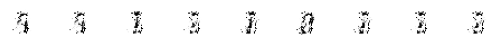

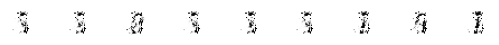

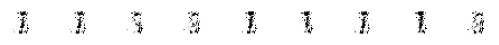

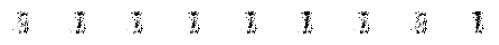

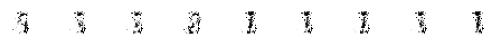

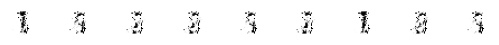

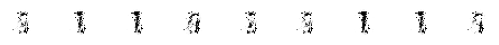

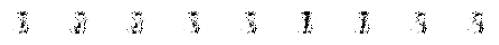

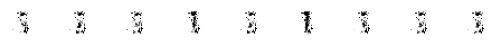

Epoch:135, Step:0, D-Loss:0.060, D-Acc:98.333, G-Loss:4.466
Epoch:135, Step:50, D-Loss:0.069, D-Acc:98.333, G-Loss:4.911
Epoch:135, Step:100, D-Loss:0.051, D-Acc:96.667, G-Loss:5.091
Epoch:135, Step:150, D-Loss:0.013, D-Acc:100.000, G-Loss:4.801
Epoch:135, Step:200, D-Loss:0.048, D-Acc:98.333, G-Loss:5.292
Epoch:135, Step:250, D-Loss:0.012, D-Acc:100.000, G-Loss:5.478
Epoch:135, Step:300, D-Loss:0.047, D-Acc:98.333, G-Loss:4.999
Epoch:135, Step:350, D-Loss:0.008, D-Acc:100.000, G-Loss:4.704
Epoch:135, Step:400, D-Loss:0.007, D-Acc:100.000, G-Loss:5.141
Epoch:135, Step:450, D-Loss:0.039, D-Acc:98.333, G-Loss:4.479
Epoch:136, Step:0, D-Loss:0.005, D-Acc:100.000, G-Loss:5.179
Epoch:136, Step:50, D-Loss:0.006, D-Acc:100.000, G-Loss:5.320
Epoch:136, Step:100, D-Loss:0.006, D-Acc:100.000, G-Loss:4.997
Epoch:136, Step:150, D-Loss:0.012, D-Acc:100.000, G-Loss:4.688
Epoch:136, Step:200, D-Loss:0.089, D-Acc:98.333, G-Loss:4.543
Epoch:136, Step:250, D-Loss:0.030, D-Acc:98.333, G-Loss:4.336
Epoch:

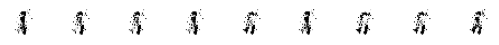

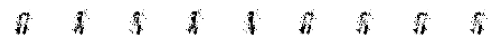

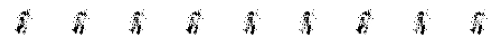

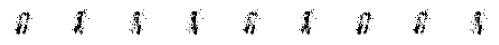

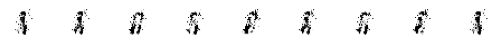

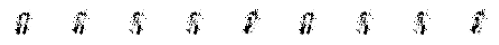

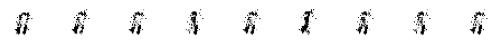

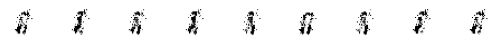

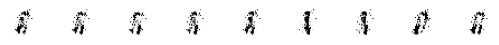

Epoch:140, Step:0, D-Loss:0.007, D-Acc:100.000, G-Loss:4.958
Epoch:140, Step:50, D-Loss:0.004, D-Acc:100.000, G-Loss:5.216
Epoch:140, Step:100, D-Loss:0.017, D-Acc:100.000, G-Loss:4.958
Epoch:140, Step:150, D-Loss:0.012, D-Acc:100.000, G-Loss:5.152
Epoch:140, Step:200, D-Loss:0.006, D-Acc:100.000, G-Loss:5.415
Epoch:140, Step:250, D-Loss:0.007, D-Acc:100.000, G-Loss:4.959
Epoch:140, Step:300, D-Loss:0.008, D-Acc:100.000, G-Loss:5.218
Epoch:140, Step:350, D-Loss:0.016, D-Acc:100.000, G-Loss:5.246
Epoch:140, Step:400, D-Loss:0.009, D-Acc:100.000, G-Loss:4.993
Epoch:140, Step:450, D-Loss:0.012, D-Acc:100.000, G-Loss:5.218
Epoch:141, Step:0, D-Loss:0.007, D-Acc:100.000, G-Loss:5.305
Epoch:141, Step:50, D-Loss:0.058, D-Acc:96.667, G-Loss:4.917
Epoch:141, Step:100, D-Loss:0.007, D-Acc:100.000, G-Loss:4.995
Epoch:141, Step:150, D-Loss:0.004, D-Acc:100.000, G-Loss:5.059
Epoch:141, Step:200, D-Loss:0.011, D-Acc:100.000, G-Loss:4.651
Epoch:141, Step:250, D-Loss:0.033, D-Acc:98.333, G-Loss:4.876


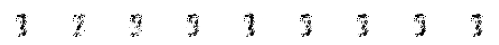

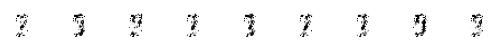

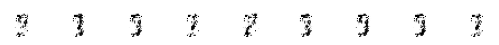

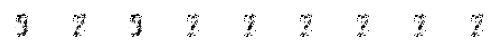

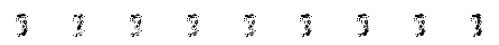

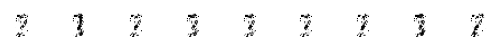

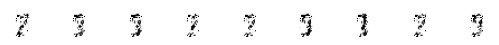

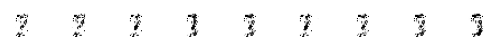

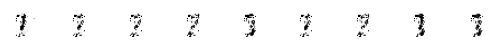

Epoch:145, Step:0, D-Loss:0.004, D-Acc:100.000, G-Loss:4.946
Epoch:145, Step:50, D-Loss:0.003, D-Acc:100.000, G-Loss:5.994
Epoch:145, Step:100, D-Loss:0.076, D-Acc:96.667, G-Loss:4.819
Epoch:145, Step:150, D-Loss:0.044, D-Acc:98.333, G-Loss:5.363
Epoch:145, Step:200, D-Loss:0.012, D-Acc:100.000, G-Loss:5.428
Epoch:145, Step:250, D-Loss:0.007, D-Acc:100.000, G-Loss:5.210
Epoch:145, Step:300, D-Loss:0.008, D-Acc:100.000, G-Loss:4.745
Epoch:145, Step:350, D-Loss:0.043, D-Acc:98.333, G-Loss:4.338
Epoch:145, Step:400, D-Loss:0.019, D-Acc:100.000, G-Loss:3.957
Epoch:145, Step:450, D-Loss:0.012, D-Acc:100.000, G-Loss:4.460
Epoch:146, Step:0, D-Loss:0.115, D-Acc:98.333, G-Loss:4.668
Epoch:146, Step:50, D-Loss:0.069, D-Acc:98.333, G-Loss:4.559
Epoch:146, Step:100, D-Loss:0.030, D-Acc:98.333, G-Loss:4.570
Epoch:146, Step:150, D-Loss:0.015, D-Acc:100.000, G-Loss:4.957
Epoch:146, Step:200, D-Loss:0.009, D-Acc:100.000, G-Loss:5.177
Epoch:146, Step:250, D-Loss:0.021, D-Acc:100.000, G-Loss:5.023
Epoc

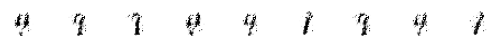

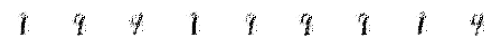

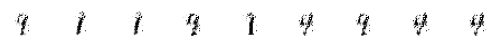

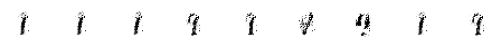

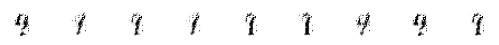

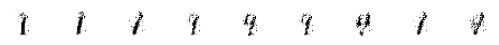

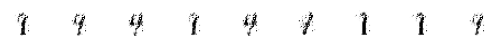

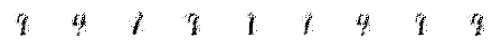

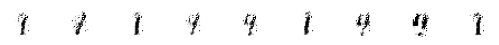

Epoch:150, Step:0, D-Loss:0.027, D-Acc:98.333, G-Loss:4.681
Epoch:150, Step:50, D-Loss:0.016, D-Acc:100.000, G-Loss:4.156
Epoch:150, Step:100, D-Loss:0.112, D-Acc:98.333, G-Loss:3.934
Epoch:150, Step:150, D-Loss:0.097, D-Acc:98.333, G-Loss:4.155
Epoch:150, Step:200, D-Loss:0.018, D-Acc:100.000, G-Loss:3.912
Epoch:150, Step:250, D-Loss:0.020, D-Acc:100.000, G-Loss:3.932
Epoch:150, Step:300, D-Loss:0.009, D-Acc:100.000, G-Loss:4.351
Epoch:150, Step:350, D-Loss:0.009, D-Acc:100.000, G-Loss:4.866
Epoch:150, Step:400, D-Loss:0.009, D-Acc:100.000, G-Loss:4.449
Epoch:150, Step:450, D-Loss:0.014, D-Acc:100.000, G-Loss:4.532
Epoch:151, Step:0, D-Loss:0.104, D-Acc:98.333, G-Loss:4.248
Epoch:151, Step:50, D-Loss:0.013, D-Acc:100.000, G-Loss:5.054
Epoch:151, Step:100, D-Loss:0.092, D-Acc:98.333, G-Loss:4.605
Epoch:151, Step:150, D-Loss:0.012, D-Acc:100.000, G-Loss:5.121
Epoch:151, Step:200, D-Loss:0.070, D-Acc:98.333, G-Loss:5.312
Epoch:151, Step:250, D-Loss:0.078, D-Acc:96.667, G-Loss:4.225
Epoch

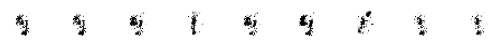

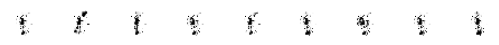

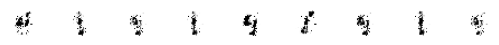

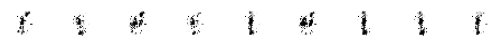

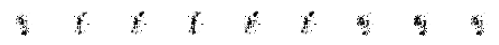

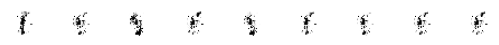

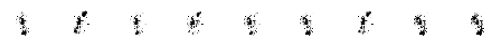

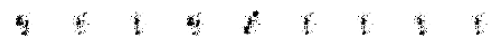

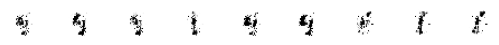

Epoch:155, Step:0, D-Loss:0.043, D-Acc:98.333, G-Loss:4.533
Epoch:155, Step:50, D-Loss:0.159, D-Acc:96.667, G-Loss:4.271
Epoch:155, Step:100, D-Loss:0.008, D-Acc:100.000, G-Loss:4.590
Epoch:155, Step:150, D-Loss:0.009, D-Acc:100.000, G-Loss:4.718
Epoch:155, Step:200, D-Loss:0.060, D-Acc:96.667, G-Loss:4.801
Epoch:155, Step:250, D-Loss:0.004, D-Acc:100.000, G-Loss:5.437
Epoch:155, Step:300, D-Loss:0.098, D-Acc:98.333, G-Loss:5.280
Epoch:155, Step:350, D-Loss:0.008, D-Acc:100.000, G-Loss:5.397
Epoch:155, Step:400, D-Loss:0.090, D-Acc:96.667, G-Loss:4.802
Epoch:155, Step:450, D-Loss:0.006, D-Acc:100.000, G-Loss:5.270
Epoch:156, Step:0, D-Loss:0.059, D-Acc:98.333, G-Loss:4.549
Epoch:156, Step:50, D-Loss:0.005, D-Acc:100.000, G-Loss:4.846
Epoch:156, Step:100, D-Loss:0.016, D-Acc:100.000, G-Loss:5.102
Epoch:156, Step:150, D-Loss:0.022, D-Acc:100.000, G-Loss:4.727
Epoch:156, Step:200, D-Loss:0.033, D-Acc:98.333, G-Loss:4.774
Epoch:156, Step:250, D-Loss:0.074, D-Acc:98.333, G-Loss:4.346
Epoch:

KeyboardInterrupt: ignored

In [11]:
epochs = 500
batch_size = 60
steps = 500
noise_size = 2

losses_d = []
losses_g = []

for i in range(0, epochs):
    if (i%5 == 0):
        show_generator_results(generator_network)
    for j in range(steps):
        fake_samples = get_fake_samples(generator_network, batch_size//2, noise_size)
        real_samples = get_real_samples(batch_size=batch_size//2)

        fake_y = np.zeros((batch_size//2, 1))
        real_y = np.ones((batch_size//2, 1))
        
        input_batch = np.vstack((fake_samples, real_samples))
        output_labels = np.vstack((fake_y, real_y))
        
        # Updating Discriminator weights
        discriminator_network.trainable=True
        loss_d = discriminator_network.train_on_batch(input_batch, output_labels)
        
        gan_input = get_random_noise(batch_size, noise_size)
        
        # Make the Discriminator belive that these are real samples and calculate loss to train the generator
        gan_output = np.ones((batch_size))
        
        # Updating Generator weights
        discriminator_network.trainable=False
        loss_g = gan_model.train_on_batch(gan_input, gan_output)
        
        losses_d.append(loss_d[0])
        losses_g.append(loss_g)
        
        if j%50 == 0:
            print ("Epoch:%.0f, Step:%.0f, D-Loss:%.3f, D-Acc:%.3f, G-Loss:%.3f"%(i,j,loss_d[0],loss_d[1]*100,loss_g))
            

# Plotting Loss function

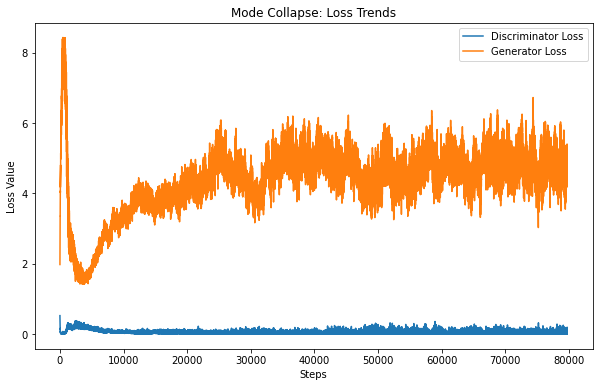

In [13]:
steps = [i for i in range(len(losses_d))]
plt.figure(figsize=(10, 6))
plt.plot(losses_d)
plt.plot(losses_g)
plt.xlabel('Steps')
plt.ylabel('Loss Value')
plt.title("Mode Collapse: Loss Trends")
plt.legend(['Discriminator Loss', 'Generator Loss'])
plt.show()